In [1]:
from __future__ import division
import numpy
import matplotlib.pyplot as pyplot
from scipy.optimize import curve_fit
from Inputs import get_data
import plotly.plotly as plotly

Exploring how the 1470nm laser is locked to the $6p^2P_{3/2} (F=5) \rightarrow 7s^2S_{1/2} (F'=4)$ transition. Uses similar method to the ground state polspec - 852nm pump beam is circularly polarized while the 1470nm probe is linearly polarized. The differences in absoption between the two polarizations create an anisotropy.

### Data - 01/12/16

In [3]:
folder = 'Scope011216\\'
trace = 'C2'
both = numpy.genfromtxt(folder+trace+'+and-00000.csv', 
                        delimiter = ',', skip_header = 5)
left = numpy.genfromtxt(folder+trace+'+00000.csv', 
                        delimiter = ',', skip_header = 5)
right = numpy.genfromtxt(folder+trace+'-00000.csv', 
                        delimiter = ',', skip_header = 5)
dark = numpy.genfromtxt(folder+trace+'dark00000.csv', 
                        delimiter = ',', skip_header = 5)

Again the signal from both detectors should be able to be replicated by combining the signals from each detector separately.

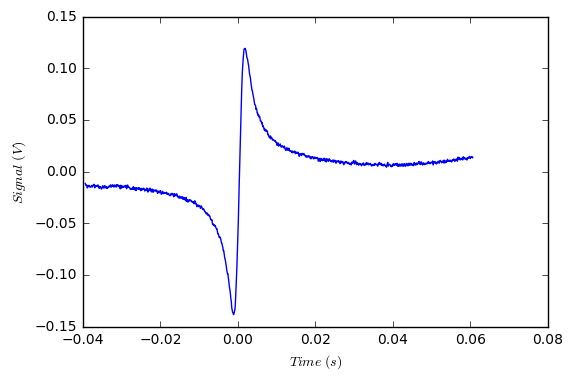

In [5]:
pyplot.figure()
pyplot.plot(both[:,0], both[:,1])
pyplot.xlabel(r'$Time\ (s)$')
pyplot.ylabel(r'$Signal\ (V)$')
pyplot.show()

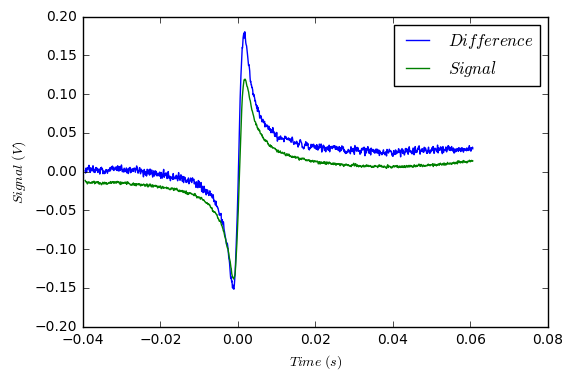

In [15]:
diff = left[:,1] + right[:,1] - dark[:,1]
pyplot.figure()
pyplot.plot(both[:,0], diff, label=r'$Difference$')
pyplot.plot(both[:,0],both[:,1], label=r'$Signal$')
pyplot.xlabel(r'$Time\ (s)$')
pyplot.ylabel(r'$Signal\ (V)$')
pyplot.legend(loc=0)
pyplot.show()

There is some discrepancy with the offset but the shape remains the same. The variation could be due to the movement of the signal - the laser seemed a little unstable. 

To calibrate the x axis in frequency units, use the separate left and right signals to get an absorption lineshape (Carr Fig. 2b) then use the FWHM and known linewidth to calibrate the axis.

Plotting the left and right signals shows the anisotropy.

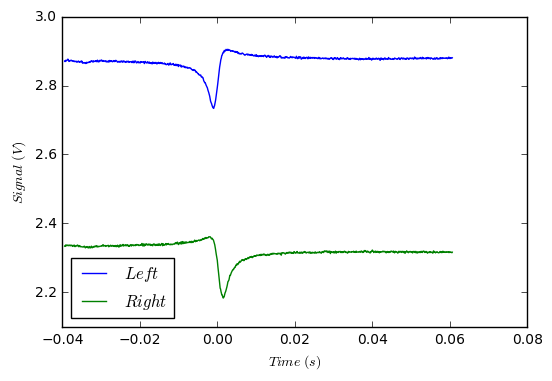

In [18]:
pyplot.figure()
pyplot.plot(left[:,0],left[:,1], label = r'$Left$')
pyplot.plot(right[:,0],-right[:,1], label = r'$Right$')
pyplot.xlabel(r'$Time\ (s)$')
pyplot.ylabel(r'$Signal\ (V)$')
pyplot.legend(loc=0)
pyplot.show()

There is considerable difference between the left and right signals. Could be due to bad alignment of detectors? Will try and to the bottom of this. For now, artificially normalise the signals so that the maximum corresponds to 100% transmission.

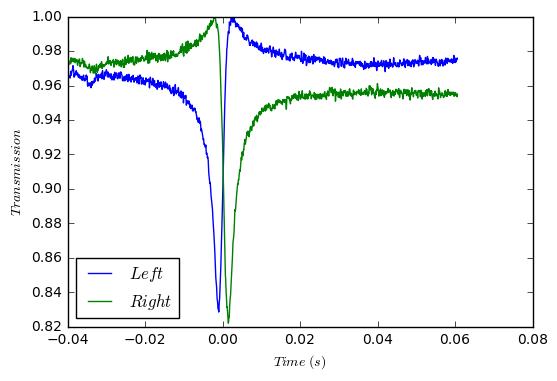

In [21]:
norm_left = left[:,1] - numpy.max(left[:,1]) + 1
norm_right = -right[:,1] - numpy.max(-right[:,1]) +1

pyplot.figure()
pyplot.plot(left[:,0],norm_left, label = r'$Left$')
pyplot.plot(right[:,0],norm_right, label = r'$Right$')
pyplot.xlabel(r'$Time\ (s)$')
pyplot.ylabel(r'$Transmission$')
pyplot.legend(loc=0)
pyplot.show()

Combining the two (left - right) should create a Lorentzian absorption profile.

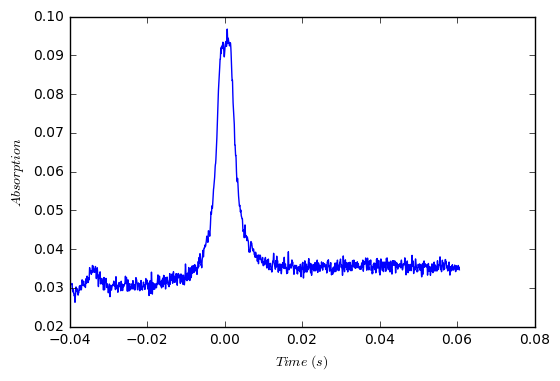

In [27]:
lineshape = 1-(norm_left + norm_right)/2
pyplot.figure()
pyplot.plot(left[:,0],lineshape)
pyplot.xlabel(r'$Time\ (s)$')
pyplot.ylabel(r'$Absorption$')
pyplot.show()

To find the FWHM try fitting a Lorentzian to the lineshape. (Not sure about the small feature on the left!).

In [26]:
def Lorentzian(x, offset, height, centre, width):
    a = 1. + 4*((x-centre)/width)**2
    return offset + height/a

In [30]:
guess = (0.03, 0.09, 0., 0.01)
params, covar = curve_fit(Lorentzian, left[:,0], lineshape, 
                          p0 = guess)
print params

[ 0.03312957  0.06705513  0.00037334  0.00459592]


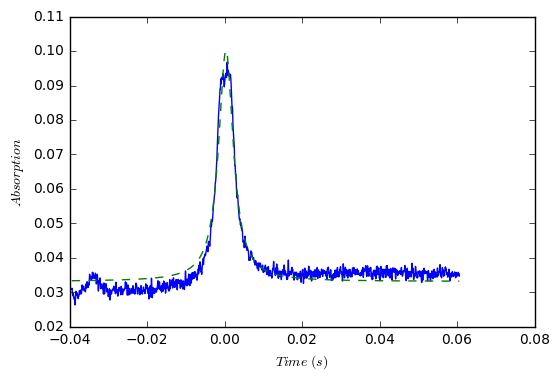

In [31]:
fitted = Lorentzian(left[:,0], params[0], params[1], params[2],params[3])

pyplot.figure()
pyplot.plot(left[:,0],lineshape)
pyplot.plot(left[:,0],fitted, linestyle='dashed')
pyplot.xlabel(r'$Time\ (s)$')
pyplot.ylabel(r'$Absorption$')
pyplot.show()

The fit gives the FWHM as 0.005 s. At these pump/probe powers (pump: $0.17\ \rm{mW}$, probe: $10.5\ \rm{\mu W}$) the linewidth of the feature is $5.7 \ \rm{MHz}$ (Carr et al.) This can be used to calibrate the x axis. 

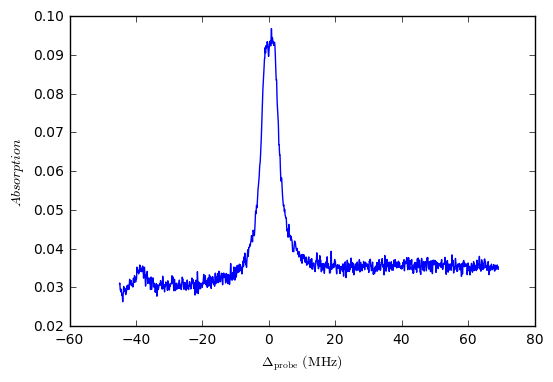

In [32]:
detuning = (left[:,0]/0.0025)*2.85 #MHz
pyplot.figure()
pyplot.plot(detuning, lineshape)
pyplot.xlabel(r'$\Delta_{\rm{probe}}\ (\rm{MHz})$')
pyplot.ylabel(r'$Absorption$')
pyplot.show()

Here we have set $\Delta_{\rm{probe}} = 0$ to be in the centre of the feature for clarity.

### Improvements

Maybe try and improve signal by taking multiple traces and averaging? Could also try and 'zoom in' on the feature by tuning the scan settings. Want to try and reduce offset too by checking detector alignment.

### Data - 2/12/16

Tried to optimise the signal to the detector - resulted in having to completely realign it so may not be an improvement!

Did take multiple traces so can average them and see if this reduces noise.

In [34]:
folder2 = 'Scope021216\\'
trace = 'C2'

In [35]:
both1 = numpy.genfromtxt(folder2+trace+'both200000.csv', 
                        delimiter = ',', skip_header = 5)
both2 = numpy.genfromtxt(folder2+trace+'both300000.csv', 
                        delimiter = ',', skip_header = 5)
both3 = numpy.genfromtxt(folder2+trace+'both400000.csv', 
                        delimiter = ',', skip_header = 5)
both4 = numpy.genfromtxt(folder2+trace+'both500000.csv', 
                        delimiter = ',', skip_header = 5)
both = (both1[:,1]+both2[:,1]+both3[:,1]+both4[:,1])/4

In [36]:
left1 = numpy.genfromtxt(folder2+trace+'left200000.csv', 
                        delimiter = ',', skip_header = 5)
left2 = numpy.genfromtxt(folder2+trace+'left300000.csv', 
                        delimiter = ',', skip_header = 5)
left3 = numpy.genfromtxt(folder2+trace+'left400000.csv', 
                        delimiter = ',', skip_header = 5)
left4 = numpy.genfromtxt(folder2+trace+'left500000.csv', 
                        delimiter = ',', skip_header = 5)
left = (left1[:,1]+left2[:,1]+left3[:,1]+left4[:,1])/4

In [38]:
right2 = numpy.genfromtxt(folder2+trace+'right300000.csv', 
                        delimiter = ',', skip_header = 5)
right4 = numpy.genfromtxt(folder2+trace+'right500000.csv', 
                        delimiter = ',', skip_header = 5)
right = (right2[:,1]+right4[:,1])/2

`right2.csv` and `right4.csv` didn't save! Plotting averaged values:

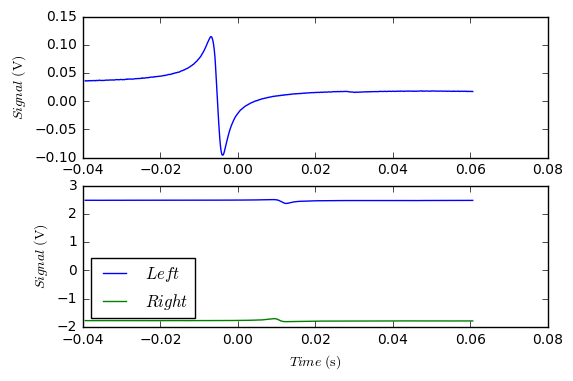

In [41]:
time = both1[:,0]
pyplot.figure()
pyplot.subplot(211)
pyplot.plot(time,both)
pyplot.ylabel(r'$Signal\ (\rm{V})$')
pyplot.subplot(212)
pyplot.plot(time,left, label=r'$Left$')
pyplot.plot(time, right, label = r'$Right$')
pyplot.xlabel(r'$Time\ (\rm{s})$')
pyplot.ylabel(r'$Signal\ (\rm{V})$')
pyplot.legend(loc=0)
pyplot.show()

Averaging does produce much smoother signals! There is still a discrepancy between the signals at the left and right detectors. This could be due to the differences in intensities at the detectors (left: , right: ) as the light to the left hand detector goes through another optical element (mirror) there may be more losses here than on the right hand side. This is not obvious here (it appears that the signal from the left hand side has a larger magnitude) but this is due to the offset induced by the PID box. This was set such that the total signal is centred on zero.

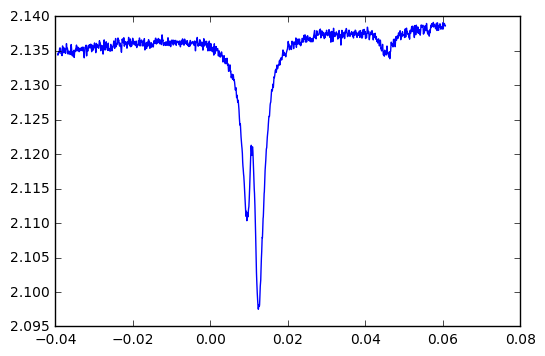

In [44]:
transmission = (left - right)/2

pyplot.figure()
pyplot.plot(time,transmission)
pyplot.show()

Not too sure about this! More data needed... Still get the small extra feature, what is this? Carr didn't seem to see this, further investigation needed.

### Data - 9/12/16

Saved ten traces for both, left, right and dark. Also tried increasing pump power to see if this altered the little feature.

In [2]:
folder = 'Scope091216'

time, both = get_data(folder, 'C2', 'both1470', 10, True)
left = get_data(folder, 'C2', 'left1470', 10, False)
right = get_data(folder, 'C2', 'right1470', 10, False)

In [3]:
both_avg = numpy.average(both, axis=0)
left_avg = numpy.average(left, axis=0)
right_avg = numpy.average(right, axis=0)

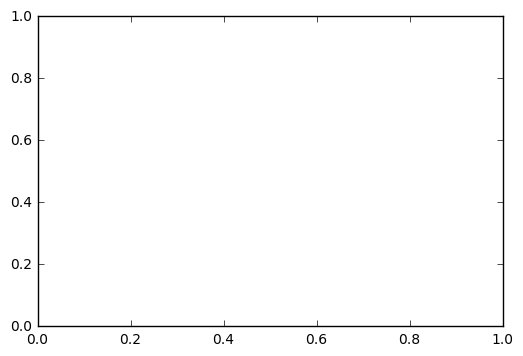

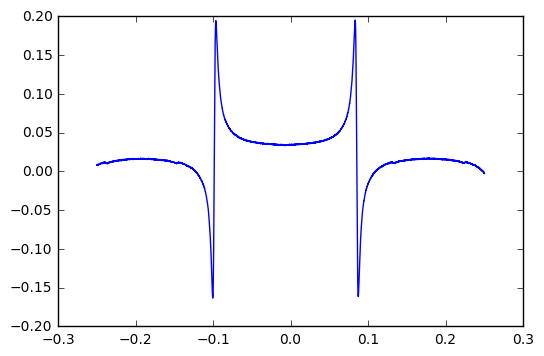

In [5]:
pyplot.figure()
pyplot.plot(time,both_avg)
pyplot.show()